<a href="https://colab.research.google.com/github/celeneheng/IS160Binder/blob/4---Taxi-Fare-Dataset/Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Yadira Heng and Bee Chang

After going over PaperSpace and its ability to do collaborative work we decided to use Google Colab instead. Maninly because of the fact that there were two big annoyance with collaborating on PaperSpace. Either risk a big bill incurring since PaperSpace did not have a free collaborative tier or use two third party party IDE, Visual Studio Code and Github, to get it to work.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('NYC_taxi_fares.csv')

In [ ]:
df.columns


Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [ ]:
def euc_distance (lat1, long1, lat2, long2):
  return(((lat1 - lat2)**2 + (long1 - long2)**2)**0.5)

df['distance'] = euc_distance(df['pickup_latitude'],
                              df['pickup_longitude'],
                              df['dropoff_latitude'],
                              df['dropoff_longitude'])


In [ ]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'distance'],
      dtype='object')

In [ ]:
df['distance']

0         0.009436
1         0.079696
2         0.013674
3         0.025340
4         0.019470
            ...   
405176    0.011798
405177    0.028482
405178    0.027336
405179    0.041406
405180         NaN
Name: distance, Length: 405181, dtype: float64

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Assuming the CSV has columns 'feature1', 'feature2', and 'label'
X = df[['passenger_count', 'distance']].values
y = df['fare_amount'].values

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a binary classification model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test df
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10
8104/8104 [==============================] - 22s 3ms/step - loss: -9092.1992 - accuracy: 0.0000e+00 - val_loss: -25620.4277 - val_accuracy: 0.0000e+00
Epoch 2/10
8104/8104 [==============================] - 18s 2ms/step - loss: -54271.9844 - accuracy: 0.0000e+00 - val_loss: -89117.5078 - val_accuracy: 0.0000e+00
Epoch 3/10
8104/8104 [==============================] - 18s 2ms/step - loss: -134952.6719 - accuracy: 0.0000e+00 - val_loss: -187280.3750 - val_accuracy: 0.0000e+00
Epoch 4/10
8104/8104 [==============================] - 19s 2ms/step - loss: -250000.7656 - accuracy: 0.0000e+00 - val_loss: -319889.7812 - val_accuracy: 0.0000e+00
Epoch 5/10
8104/8104 [==============================] - 17s 2ms/step - loss: -399050.8438 - accuracy: 0.0000e+00 - val_loss: -486089.2812 - val_accuracy: 0.0000e+00
Epoch 6/10
8104/8104 [==============================] - 20s 3ms/step - loss: -581499.5625 - accuracy: 0.0000e+00 - val_loss: -685908.7500 - val_accuracy: 0.0000e+00
Epoch 7/10
8104

^ The above algorithm could not be salvaged with 1808878 loss and literally 0 accuracy. So, we decided to leave it and try a different approach

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Feature selection (you may need to adjust this based on your actual dfset)
features = df[['distance', 'passenger_count']].values
target = df['fare_amount'].values

# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the dfset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Reshape the input df to be 3D (samples, timesteps, features) for LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error is used for regression problems

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on the test set: {mse}')

# Make predictions
predictions = model.predict(X_test)

# You can use predictions for further analysis or visualization


Epoch 1/10
10130/10130 [==============================] - 33s 3ms/step - loss: 100.7183
Epoch 2/10
10130/10130 [==============================] - 31s 3ms/step - loss: 59.5263
Epoch 3/10
10130/10130 [==============================] - 32s 3ms/step - loss: 35.4024
Epoch 4/10
10130/10130 [==============================] - 31s 3ms/step - loss: 34.7685
Epoch 5/10
10130/10130 [==============================] - 31s 3ms/step - loss: 34.4088
Epoch 6/10
10130/10130 [==============================] - 30s 3ms/step - loss: 34.1379
Epoch 7/10
10130/10130 [==============================] - 32s 3ms/step - loss: 33.8951
Epoch 8/10
10130/10130 [==============================] - 32s 3ms/step - loss: 33.6984
Epoch 9/10
10130/10130 [==============================] - 34s 3ms/step - loss: 33.5091
Epoch 10/10
2533/2533 [==============================] - 5s 2ms/step - loss: 35.5855
Mean Squared Error on the test set: 35.585533142089844
2533/2533 [==============================] - 5s 2ms/step


### Yadira's output
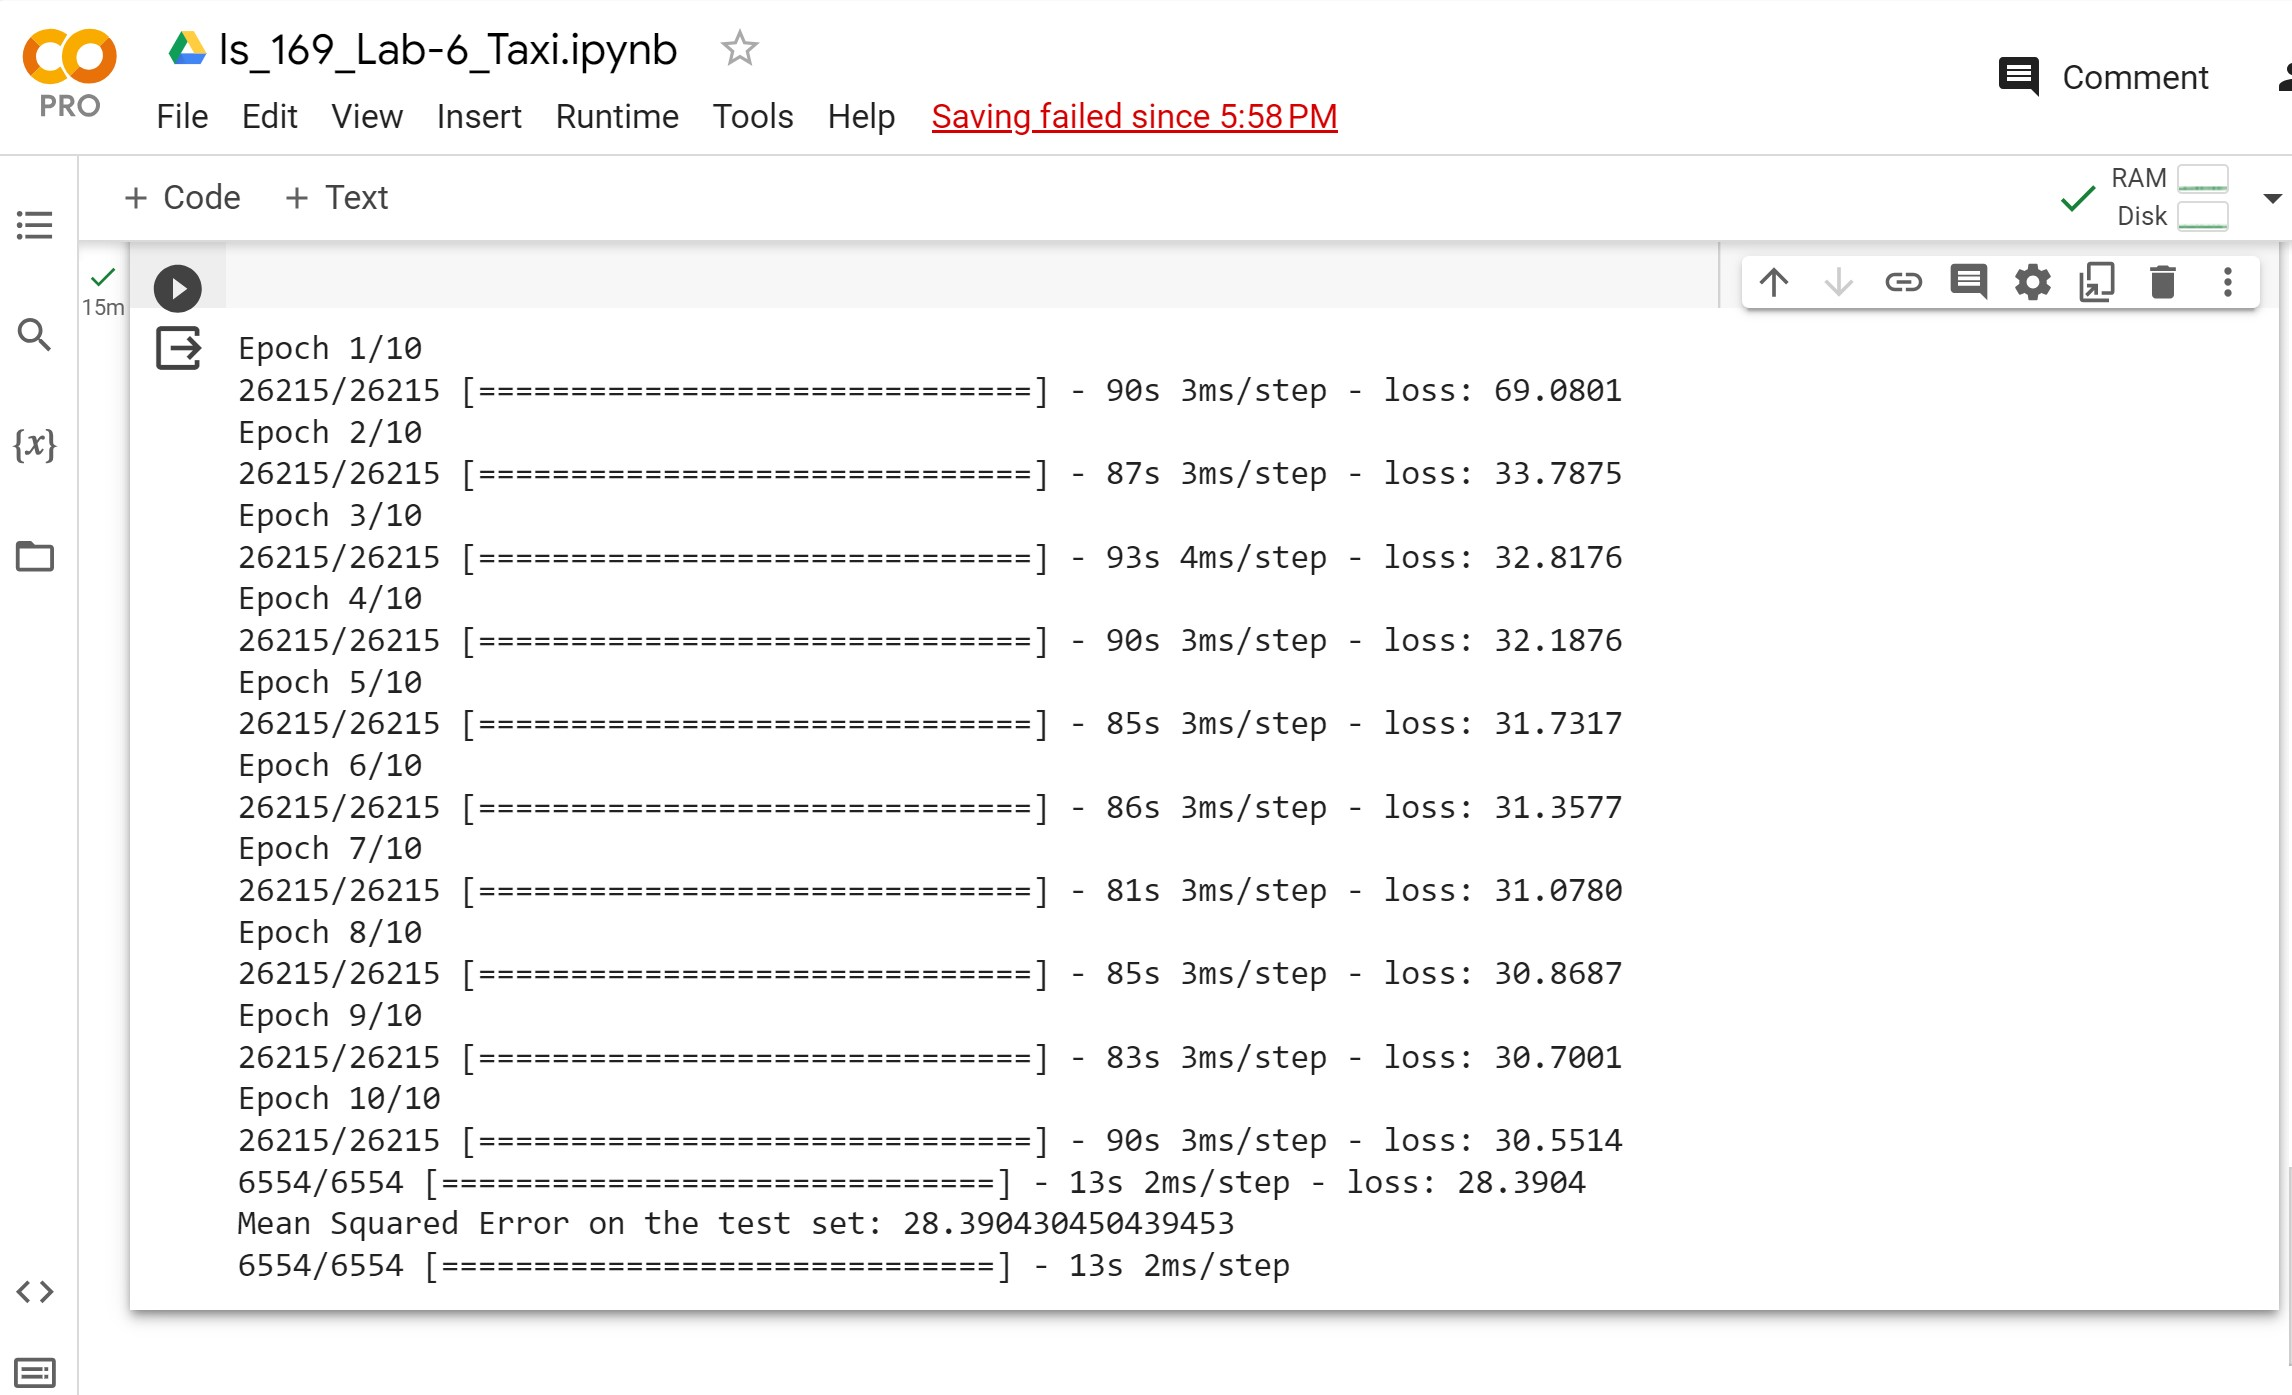

In [ ]:
print(f'Predictions on the test set: {predictions}')

Predictions on the test set: [[10.948511]
 [17.225937]
 [12.663079]
 ...
 [12.782361]
 [ 6.926951]
 [28.652563]]


Yadira's Predictions
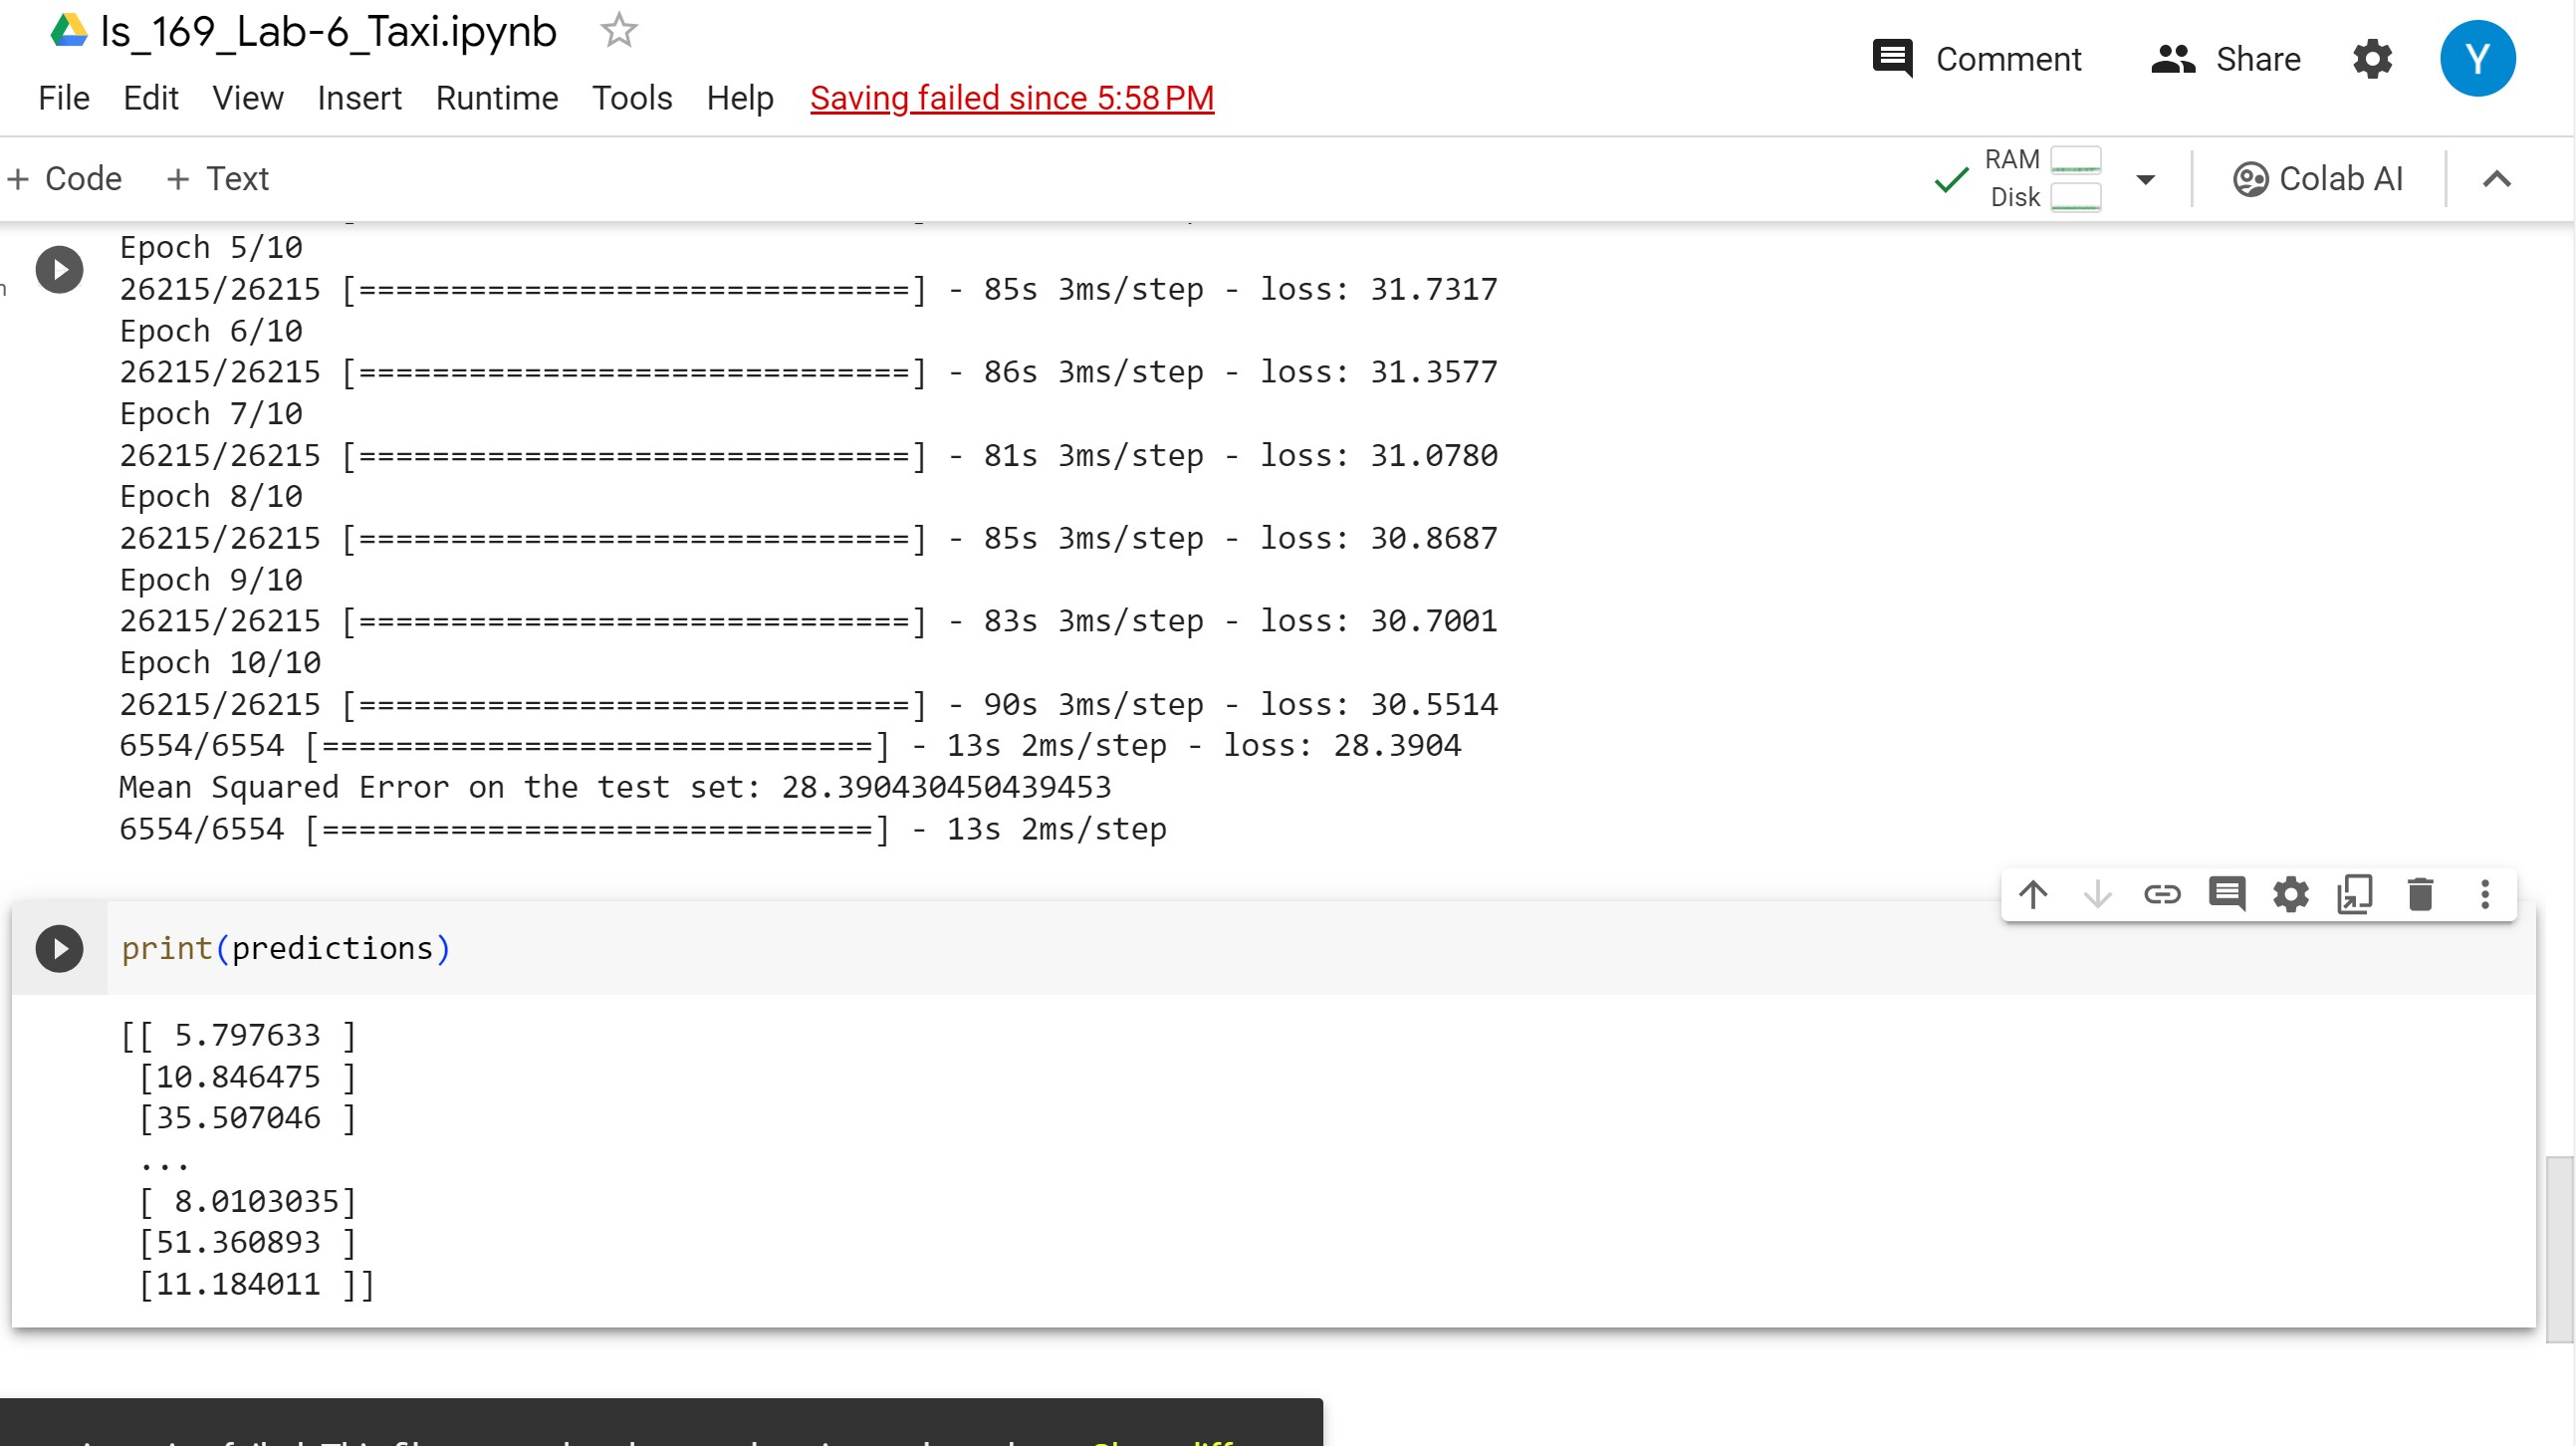

The results suggest that the model is not performing well. The high loss value and relatively low accuracy indicate that the model's predictions are not accurate, and it struggles to correctly classify the data.